# Homework 4 Computational Problems 

## Problem 1: matrix multiplication as outer products

In class, we saw that matrix multiplication can be accomplished via a sum of _outer products_. Specifically, suppose that $\boldsymbol{A} \in \mathbb{R}^{m\times n}, \boldsymbol{B}\in \mathbb{R}^{n\times p}$ are matrices, and denote $\boldsymbol{a}_{:1},\dots,\boldsymbol{a}_{:n}$ as the columns of $\boldsymbol{A}$ and $\boldsymbol{b}_{1:},\dots,\boldsymbol{b}_{n:}$ as the rows of $\boldsymbol{B}$. Then we can compute the product $\boldsymbol{AB}$ using the formula:

$$
\boldsymbol{AB} = \sum_{i=1}^n \boldsymbol{a}_{:i}\boldsymbol{b}_{i:}^\top 
$$

Note that each term $\boldsymbol{a}_{:i}\boldsymbol{b}_{i:}^\top$ is called the _outer product_ of the vectors $\boldsymbol{a}_{:i}$ and $\boldsymbol{b}_{i:}$, which is a $m\times p$ matrix, and that the sum is the usual entry-wise sum over matrices. 

### Part A: implementing matrix multiplication with outer products

Write a function `op_mat_mul(A,B)` which takes in two numpy arrays $\boldsymbol{A},\boldsymbol{B}$ and computes the product $\boldsymbol{AB}$ using the outer product formula given above (you can use the `numpy` function `np.outer(a,b)` to compute the outer product of two 1-d arrays `a` and `b`). Generate two matrices $\boldsymbol{A},\boldsymbol{B}$ (of any dimension you'd like) and verify that your function gives the same output as the `numpy` function `np.dot`. 

In [2]:
import numpy as np

def op_mat_mul(A,B):
    AB = np.zeros((A.shape[0],B.shape[1]))
    for i in range(A.shape[1]):
        AB = AB + np.outer(A[:,i], B[i,:])
    return AB

m,n,p = 5,4,3
A = np.random.normal(size=(m,n))
B = np.random.normal(size=(n,p))

print(np.allclose(op_mat_mul(A,B),np.dot(A,B)))

True


### Part B: testing the speed of outer product matrix multiplication vs `np.dot`
For each $n=20,40,60,\dots,1000$, generate two $n\times n$ matrices $\boldsymbol{A},\boldsymbol{B}$ and calculate the time required to compute the product $\boldsymbol{AB}$ using 1) your function `op_mat_mul` and 2) the `numpy` function `np.dot` (see the online workbook for an example of how to calculate computation time in Python). Store the results. For each value, and plot the computation time as a function of $n$ for both functions. Which method is more efficient?

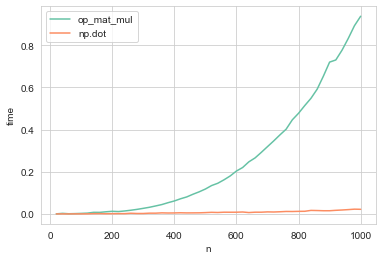

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
sns.set_style('whitegrid')
sns.set_palette('Set2')

time_slow = []
time_fast = []
for n in np.arange(20,1020,20):
    A = np.random.randn(n,n)
    B = np.random.randn(n,n)
    
    tic = time.time()
    op_mat_mul(A,B)
    time_slow.append(time.time()-tic)
    
    tic = time.time()
    np.dot(A,B)
    time_fast.append(time.time()-tic)
    
plt.plot(np.arange(20,1020,20), time_slow, label='op_mat_mul')
plt.plot(np.arange(20,1020,20), time_fast, label='np.dot')
plt.legend()
plt.xlabel('n')
plt.ylabel('time')
plt.show()

## Problem 2: Be smart about the order when doing matrix multiplications
You can use the function `np.dot` to compute the matrix product of two or more arrays by nesting functions. For example we can compute the product $\boldsymbol{ABC}$ using:

In [9]:
A = np.random.random((100, 100))
B = np.random.random((100, 100))
C = np.random.random((100, 5))

ABC_v1 = np.dot(np.dot(A,B),C) #first compute AB, then multiply by C on the right

However, we could equivalently calculate this as

In [11]:
ABC_v2 = np.dot(A, np.dot(B,C)) #first compute BC, then multipy by A on the left
print(np.allclose(ABC_v1, ABC_v2))

True


While the two methods yield the same result, they are not equivalent in terms of speed. Find the best order for computing the product $\boldsymbol{ABCD}$ for the following 4 matrices. (Hint: the computation should take less than a second.) Why do you think this is the fastest method?

In [ ]:
A = np.random.random((20000, 100))
B = np.random.random((100, 1000))
C = np.random.random((1000, 5))
D = np.random.random((5, 5))